In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re
import datetime
from scipy.stats import pearsonr

In [2]:
transaction_df = pd.read_excel('QVI_transaction_data.xlsx')
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_df = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_df.shape

(264836, 8)

In [5]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
for feature in transaction_df:
    print(np.round(transaction_df[feature].isnull().mean(),4))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [7]:
purchase_df.shape

(72637, 3)

In [8]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
for feature in purchase_df:
    print(np.round(purchase_df[feature].isnull().mean(),4))

0.0
0.0
0.0


There are no null values in both the datasets

There are total three object type features in both the datasets

DATE

In [10]:
transaction_df['DATE'].describe()

count    264836.000000
mean      43464.036260
std         105.389282
min       43282.000000
25%       43373.000000
50%       43464.000000
75%       43555.000000
max       43646.000000
Name: DATE, dtype: float64

In [11]:
len(transaction_df['DATE'].unique())

364

In [12]:
def serial_date_to_string(srl_no):
    new_date = datetime.datetime(1899,12,30,0,0) + datetime.timedelta(srl_no)
    return new_date.strftime("%Y-%m-%d")

In [13]:
transaction_df['DATE'] = transaction_df['DATE'].apply(serial_date_to_string)

In [14]:
len(transaction_df['PROD_NAME'].unique())

114

In [15]:
len(purchase_df['LIFESTAGE'].unique())

7

In [16]:
purchase_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [17]:
len(purchase_df['PREMIUM_CUSTOMER'].unique())

3

In [18]:
purchase_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

One hot encoding.

In [19]:
dummy_df = pd.get_dummies(purchase_df['LIFESTAGE'])
dummy_df.head()

,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [20]:
purchase_df = pd.concat([purchase_df,dummy_df],axis=1)
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,1000,YOUNG SINGLES/COUPLES,Premium,0,0,0,0,0,0,1
1,1002,YOUNG SINGLES/COUPLES,Mainstream,0,0,0,0,0,0,1
2,1003,YOUNG FAMILIES,Budget,0,0,0,0,0,1,0
3,1004,OLDER SINGLES/COUPLES,Mainstream,0,0,0,1,0,0,0
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,1,0,0,0,0,0,0


In [21]:
purchase_df=purchase_df.drop(['LIFESTAGE'],axis=1)

In [22]:
purchase_df.shape

(72637, 9)

In [23]:
dummy_df = pd.get_dummies(purchase_df['PREMIUM_CUSTOMER'])
purchase_df = pd.concat([purchase_df,dummy_df],axis=1)
purchase_df=purchase_df.drop(['PREMIUM_CUSTOMER'],axis=1)

In [24]:
purchase_df.head()

,LYLTY_CARD_NBR,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
0,1000,0,0,0,0,0,0,1,0,0,1
1,1002,0,0,0,0,0,0,1,0,1,0
2,1003,0,0,0,0,0,1,0,1,0,0
3,1004,0,0,0,1,0,0,0,0,1,0
4,1005,1,0,0,0,0,0,0,0,1,0


Deriving packet size from PROD_NAME

In [25]:
pack_size = []
for i in range(0,len(transaction_df['PROD_NAME'])):
    string = transaction_df['PROD_NAME'][i]
    pack_size.append(int(re.findall("\d?\d?\d",string)[0]))
print(pack_size[0:10])

[175, 175, 170, 175, 150, 300, 330, 210, 150, 210]


In [26]:
transaction_df['PACK_SIZE'] = pack_size

In [27]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


Check if all products are chips

In [28]:
transaction_df['PROD_NAME'].head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [29]:
arr_words = []
arr_words_other = []
for i in range(0,len(transaction_df['PROD_NAME'])):
    string = transaction_df['PROD_NAME'][i]
    str1 = re.findall("\w+",string)
    for j in range(0,len(str1)-1):
        arr_words.append(str1[j])

counts = pd.Series(arr_words).value_counts().sort_values(ascending=False)
print(counts)

Chips       49770
Kettle      41288
Smiths      28860
Cheese      27890
Pringles    25102
            ...  
Onin         1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 196, dtype: int64


Some words like Salsa, Burger could be other products and not words describing chips.<br>
(Removing only Salsa to be consistent with Task2 Solution) 

In [31]:
def find_not_chips(name):
    #words = re.findall("\w+",name) 
    if (re.search('salsa',name.lower()) != None):
        transaction_df.drop(transaction_df[transaction_df.PROD_NAME == name].index, inplace=True)
    else:
        return
            
transaction_df['PROD_NAME'].apply(find_not_chips)

0         None
1         None
2         None
3         None
4         None
          ... 
264831    None
264832    None
264833    None
264834    None
264835    None
Name: PROD_NAME, Length: 246742, dtype: object

In [44]:
transaction_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330


Deriving company name from PROD_NAME

In [32]:
transaction_df['COMPANY_INITIALS'] = transaction_df['PROD_NAME'].apply(lambda x: x.split()[0])

In [17]:
transaction_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths


In [33]:
transaction_df = transaction_df.drop(['PROD_NAME'],axis=1)

In [20]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle


In [34]:
company_frequency = transaction_df['COMPANY_INITIALS'].value_counts()
company_dict = company_frequency.to_dict()
i = 0

print(company_dict)

{'Kettle': 41288, 'Smiths': 27390, 'Pringles': 25102, 'Doritos': 22041, 'Thins': 14075, 'RRD': 11894, 'Infuzions': 11057, 'WW': 10320, 'Cobs': 9693, 'Tostitos': 9471, 'Twisties': 9454, 'Tyrrells': 6442, 'Grain': 6272, 'Natural': 6050, 'Cheezels': 4603, 'CCs': 4551, 'Red': 4427, 'Dorito': 3185, 'Infzns': 3144, 'Smith': 2963, 'Cheetos': 2927, 'Snbts': 1576, 'Burger': 1564, 'Woolworths': 1516, 'GrnWves': 1468, 'Sunbites': 1432, 'NCC': 1419, 'French': 1418}


Changing: NCC - Natural Chip Company, WW- woolworths, RRD-red rock deli, Infzns-Infuzions, GrnWves- Grain Waves,Dorito - Doritos, Smith-Smiths, Snbts - Sunbites

In [35]:

def ambi_companies(row):
    if row == 'NCC':
        return 'Natural'
    elif row == 'WW':
        return 'Woolworths'
    elif row == 'RRD':
        return 'Red'
    elif row == 'Infzns':
        return 'Infuzions'
    elif row == 'GrnWves':
        return 'Grain'
    elif row == 'Dorito':
        return 'Doritos'
    elif row == 'Smith':
        return 'Smiths'
    elif row == 'Snbts':
        return 'Sunbites'
    else:
        return row
transaction_df['COMPANY_INITIALS'] = transaction_df['COMPANY_INITIALS'].apply(ambi_companies)

In [36]:
company_frequency = transaction_df['COMPANY_INITIALS'].value_counts()
company_dict_final = company_frequency.to_dict()

for key,value in company_dict_final.items():
    company_dict_final[key] = i
    i = i+1
print(company_dict_final)

{'Kettle': 0, 'Smiths': 1, 'Doritos': 2, 'Pringles': 3, 'Red': 4, 'Infuzions': 5, 'Thins': 6, 'Woolworths': 7, 'Cobs': 8, 'Tostitos': 9, 'Twisties': 10, 'Grain': 11, 'Natural': 12, 'Tyrrells': 13, 'Cheezels': 14, 'CCs': 15, 'Sunbites': 16, 'Cheetos': 17, 'Burger': 18, 'French': 19}


Label encoding 'COMPANY_INITIALS' according to frequency

In [37]:
def company_encode(comp):
    for key,value in company_dict_final.items():
        if key == comp:
            return value
        
transaction_df['COMPANY_INITIALS'] = transaction_df['COMPANY_INITIALS'].apply(company_encode)
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS
0,2018-10-17,1,1000,1,5,2,6.0,175,12
1,2019-05-14,1,1307,348,66,3,6.3,175,15
2,2019-05-20,1,1343,383,61,2,2.9,170,1
3,2018-08-17,2,2373,974,69,5,15.0,175,1
4,2018-08-18,2,2426,1038,108,3,13.8,150,0


In [38]:
customer_df = pd.merge(transaction_df, purchase_df,how='left', on = 'LYLTY_CARD_NBR')
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
0,2018-10-17,1,1000,1,5,2,6.0,175,12,0,0,0,0,0,0,1,0,0,1
1,2019-05-14,1,1307,348,66,3,6.3,175,15,1,0,0,0,0,0,0,1,0,0
2,2019-05-20,1,1343,383,61,2,2.9,170,1,1,0,0,0,0,0,0,1,0,0
3,2018-08-17,2,2373,974,69,5,15.0,175,1,1,0,0,0,0,0,0,1,0,0
4,2018-08-18,2,2426,1038,108,3,13.8,150,0,1,0,0,0,0,0,0,1,0,0


In [41]:
customer_df.shape

(242009, 19)

Outliers

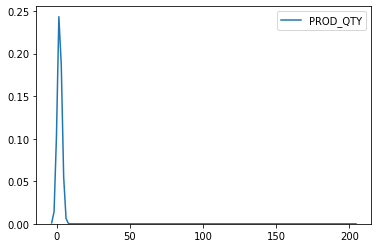

In [42]:
sns.kdeplot(customer_df['PROD_QTY'],bw=1.5)
plt.show()

In [26]:
customer_df[customer_df['PROD_QTY'].isin(range(6,199))]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium


In [27]:
customer_df[customer_df['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
63682,2018-08-19,226,226000,226201,4,200,650.0,380,2,0,0,1,0,0,0,0,0,0,1
63683,2019-05-20,226,226000,226210,4,200,650.0,380,2,0,0,1,0,0,0,0,0,0,1


So product quantities are in from 1 to 5 and 2 transactions of 200

In [52]:
customer_df[customer_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
64955,2018-08-19,226,226000,226201,4,200,650.0,380,2,Premium,0,0,1,0,0,0,0
64956,2019-05-20,226,226000,226210,4,200,650.0,380,2,Premium,0,0,1,0,0,0,0


LYLTY_CARD_NBR of 226000 has made only two transactions in an year and both times the product quantity is 200. This customer is not an ordinary retail member. Thus removing him.

In [39]:
customer_df.drop(customer_df[customer_df['LYLTY_CARD_NBR'] == 226000].index, inplace=True)

<b>Analysis

In [47]:
for feature in customer_df:
    print(np.round(customer_df[feature].isnull().mean(),4))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


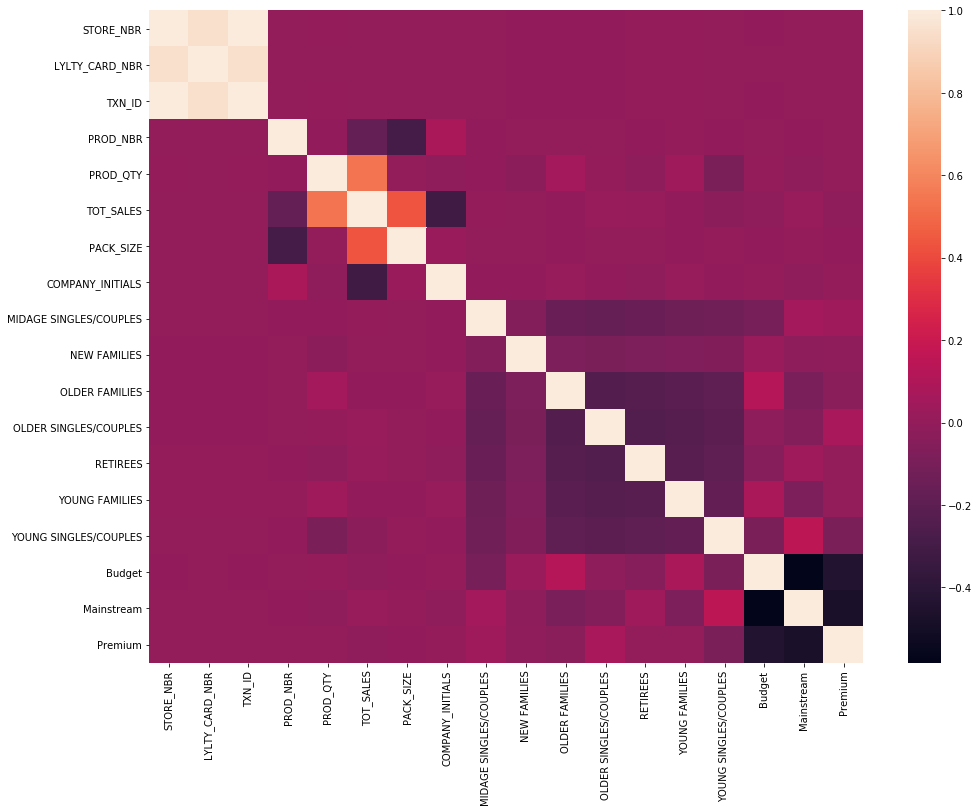

In [48]:
plt.figure(figsize=(16,12))
sns.heatmap(customer_df.corr())
plt.show()

<b>Store Analysis:

Questions answered:
<br>
1. Which are the top sales driving stores?
2. What customers drive max sales in top stores?
3. What percentage of sales do each lifestage customer and premium customer have in top stores?

In [49]:
len(customer_df['STORE_NBR'].unique())

271

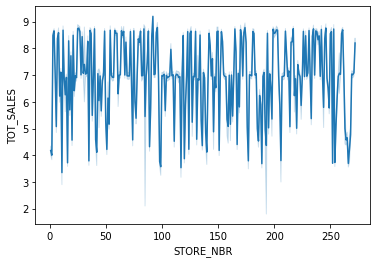

In [50]:
sns.lineplot(x='STORE_NBR',y='TOT_SALES',data=customer_df)
plt.show()

10 Most popular stores

In [51]:
customer_df['STORE_NBR'].value_counts().head(10)

226    1882
88     1759
165    1715
237    1682
93     1670
40     1632
58     1618
43     1580
230    1579
213    1572
Name: STORE_NBR, dtype: int64

10 Stores having the highest sales

Distribution of type of customers in the 5 stores having highest sales

In [23]:
total = customer_df.groupby(['STORE_NBR','LYLTY_CARD_NBR']).sum().sort_values(by='TOT_SALES',ascending=False)
print(total[['TOT_SALES','MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES','Budget','Mainstream','Premium']].head(5))

                          TOT_SALES  MIDAGE SINGLES/COUPLES  NEW FAMILIES  \
STORE_NBR LYLTY_CARD_NBR                                                    
230       230078              138.6                       0             0   
58        58361               124.8                       0             0   
179       179228              120.8                       0             0   
199       199157              118.8                       0             0   
3         3153                116.4                      13             0   

                          OLDER FAMILIES  OLDER SINGLES/COUPLES  RETIREES  \
STORE_NBR LYLTY_CARD_NBR                                                    
230       230078                      17                      0         0   
58        58361                        0                      0         0   
179       179228                       0                      0         0   
199       199157                       0                      0         0  

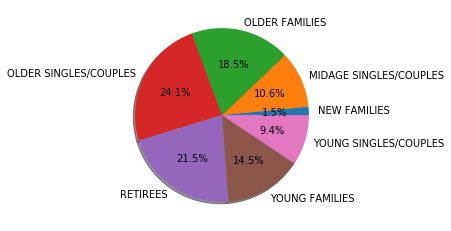

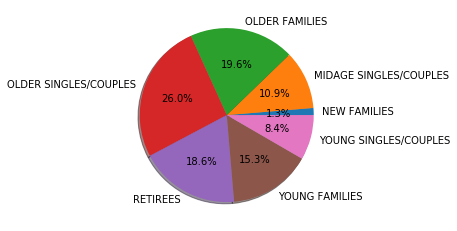

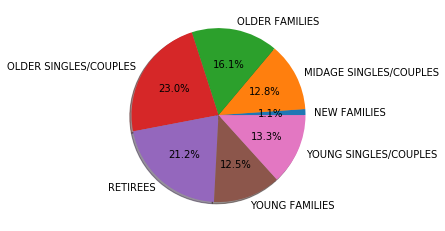

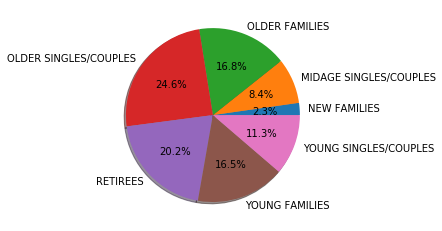

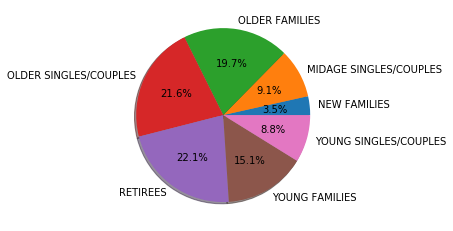

In [53]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
for i in total.index[0:5]:
    arr = []
    for col in columns:
        arr.append(total[col][i])
    plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
    plt.show()

In all the top 5 stores having maximum sales, 'OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES' are the top 3 type of customers.

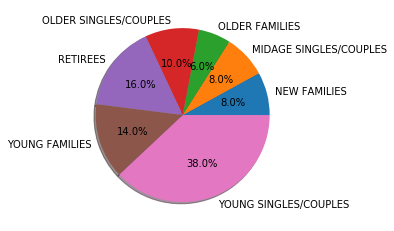

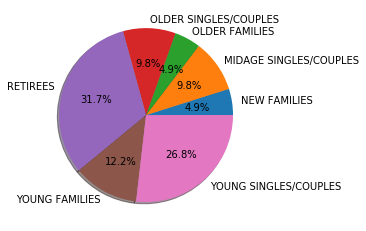

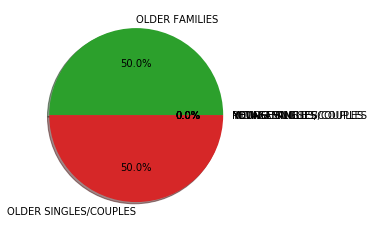

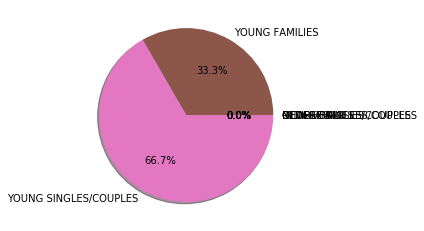

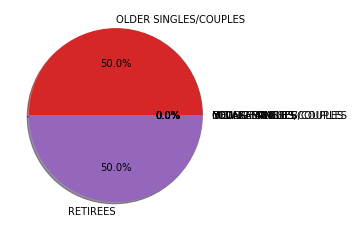

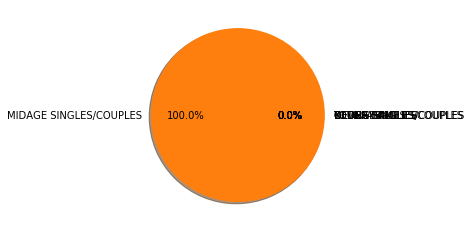

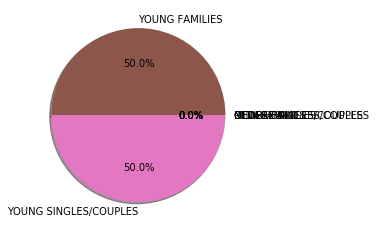

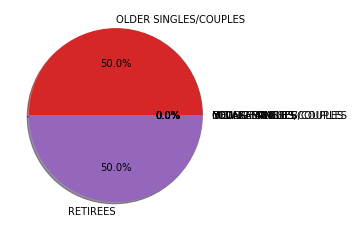

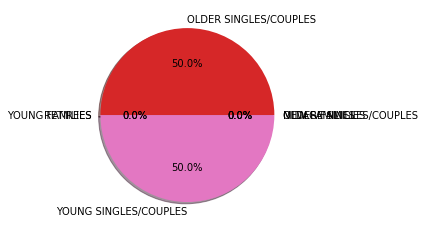

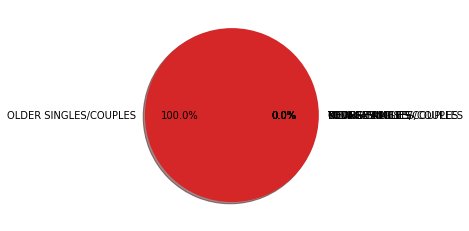

In [54]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
for i in total.index[-10:]:
    arr = []
    for col in columns:
        arr.append(total[col][i])
    plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
    plt.show()

In the 10 lowest sales stores, 'YOUNG FAMILIES','YOUNG SINGLES/COUPLES' constitue a much higher sale than the top 3.

This could indicate that the older couples do stick with the biggest and most popular stores but the younger people are open to change.

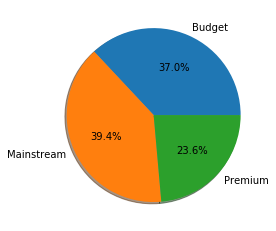

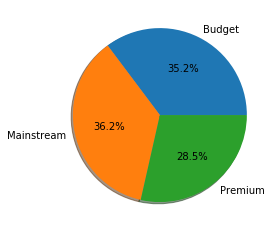

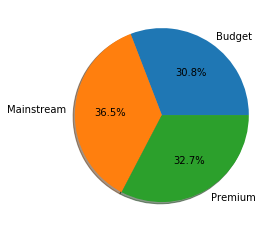

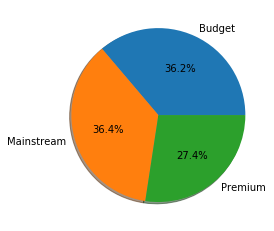

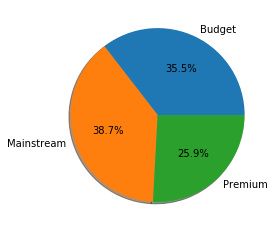

In [55]:
columns = ['Budget','Mainstream','Premium']
for i in total.index[0:5]:
    arr = []
    for col in columns:
        arr.append(total[col][i])
    plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
    plt.show()

<b>What amount of sales each subcategory of Budget,Mainstream and Premium customers give?

In [55]:
group_cust = customer_df.groupby(['LYLTY_CARD_NBR'],as_index=False)['Budget','Premium','Mainstream','NEW FAMILIES',
                                                                        'MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES',
                                                                    'RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES'].mean()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [48]:
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
0,2018-10-17,1,1000,1,5,2,6.0,175,12,0,0,0,0,0,0,1,0,0,1
1,2019-05-14,1,1307,348,66,3,6.3,175,15,1,0,0,0,0,0,0,1,0,0
2,2019-05-20,1,1343,383,61,2,2.9,170,1,1,0,0,0,0,0,0,1,0,0
3,2018-08-17,2,2373,974,69,5,15.0,175,1,1,0,0,0,0,0,0,1,0,0
4,2018-08-18,2,2426,1038,108,3,13.8,150,0,1,0,0,0,0,0,0,1,0,0


In [66]:
prod_qty_by_cust = customer_df.groupby(['LYLTY_CARD_NBR'],as_index=False)[['PROD_QTY','TOT_SALES']].sum()

In [67]:
group_cust[['PROD_QTY','TOT_SALES']] = prod_qty_by_cust[['PROD_QTY','TOT_SALES']]

In [68]:
group_cust.head()

,LYLTY_CARD_NBR,Budget,Premium,Mainstream,NEW FAMILIES,MIDAGE SINGLES/COUPLES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,PROD_QTY,TOT_SALES
0,1000,0,1,0,0,0,0,0,0,0,1,2,6.0
1,1002,0,0,1,0,0,0,0,0,0,1,1,2.7
2,1003,1,0,0,0,0,0,0,0,1,0,2,6.6
3,1004,0,0,1,0,0,0,1,0,0,0,1,1.9
4,1005,0,0,1,0,1,0,0,0,0,0,1,2.8


In [41]:
total_bud = group_cust['Budget'].sum()
total_main = group_cust['Mainstream'].sum()
total_prem = group_cust['Premium'].sum()
print(total_bud)
print(total_main)
print(total_prem)

24006
28734
18547


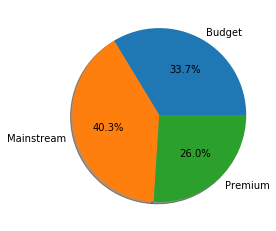

In [43]:
columns = ['Budget','Mainstream','Premium']
arr = [total_bud, total_main, total_prem]
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

In [69]:
budget_group = group_cust[group_cust['Budget'] == 1]
main_group = group_cust[group_cust['Mainstream'] == 1]
prem_group = group_cust[group_cust['Premium'] == 1]

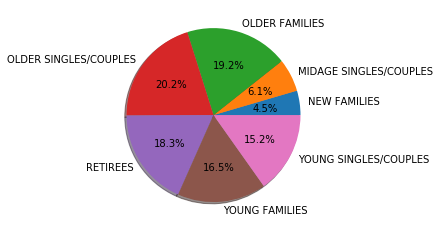

In [70]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(budget_group[col].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

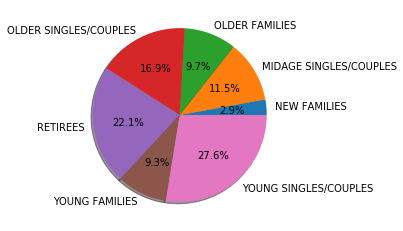

In [46]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(main_group[col].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

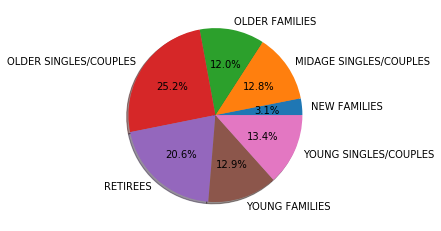

In [47]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(prem_group[col].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

Is the maximum sales of above groups due to sales in those segments or the quantity purchased?

Product Quantity

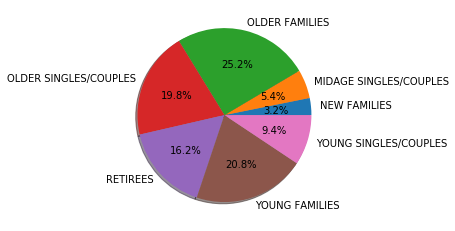

In [61]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(budget_group['PROD_QTY'][budget_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

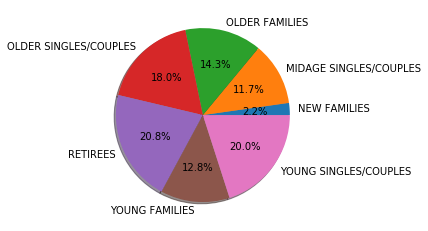

In [64]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(main_group['PROD_QTY'][main_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

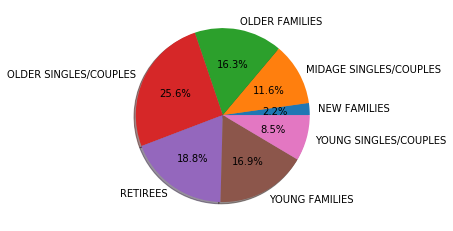

In [65]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(prem_group['PROD_QTY'][prem_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

SALES

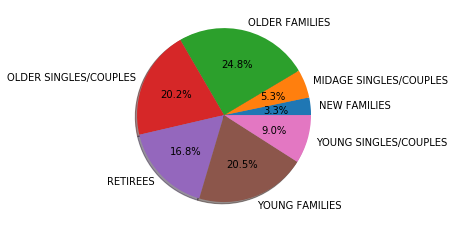

In [71]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(budget_group['TOT_SALES'][budget_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

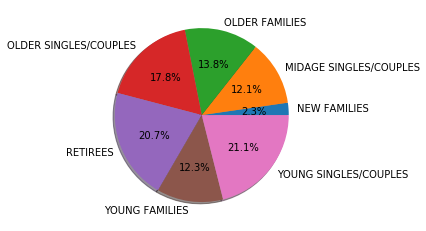

In [72]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(main_group['TOT_SALES'][main_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

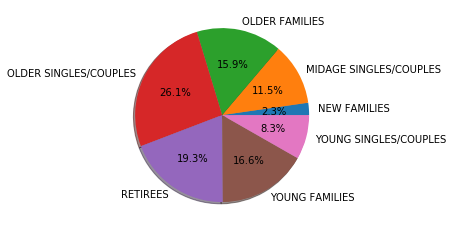

In [73]:
columns = ['NEW FAMILIES','MIDAGE SINGLES/COUPLES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
arr = []
for col in columns:
    arr.append(prem_group['TOT_SALES'][prem_group[col] == 1].sum())
plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
plt.show()

<b>Budget Segment:</b><br>
Max Customers:Older Singles/Couples,older families<br>
Max product quantity sub segment:Older Families<br>
Max Sales:Older Families<br>
   
<b>Mainstream Segment:</b><br>
Max Customers:young singles/couples<br>
Max product quantity sub segment:Retirees and young singles/couples<br>
Max Sales:Retirees and young singles/couples<br>
   
<b>Premium Segment:</b><br>
Max Customers:older singles/couples<br>
Max product quantity sub segment:older singles/couples<br>
Max Sales:older singles/couples<br>

<b>Units per customer:

<b>PROD_NBR

In [ ]:
customer_df['PROD_NBR'].describe()

In [ ]:
prod_group = customer_df.groupby(['PROD_NBR']).sum()
prod_sorted = prod_group[['PROD_QTY','TOT_SALES']].sort_values(by='TOT_SALES',ascending=False).head(10)
print(prod_sorted)

In [ ]:
company = []
size = []
for i in prod_sorted.index:
    a = customer_df[customer_df['PROD_NBR'] == i]
    company.append(int(a['COMPANY_INITIALS'][:1]))
    size.append(int(a['PACK_SIZE'][:1]))
prod_sorted['COMPANY'] = company
prod_sorted['PACK_SIZE'] = size
print(prod_sorted)

Top 10 products giving max sales. Companies 0 and 1 have a number of high selling products.

In [ ]:
prod_group[['PROD_QTY','TOT_SALES']].sort_values(by='PROD_QTY',ascending=False).head(10)

Top 10 bought products

<b>COMPANY_INITIALS

In [ ]:
company_group = customer_df.groupby(['COMPANY_INITIALS']).sum()
company_sorted = company_group[['TOT_SALES','PROD_QTY','Budget','Mainstream','Premium']].sort_values(by='TOT_SALES',ascending=False).head(10)
print(company_sorted)

In [ ]:
columns = ['Budget','Mainstream','Premium']
for i in company_sorted.index:
    arr = []
    for col in columns:
        arr.append(company_sorted[col][i])
    plt.pie(arr,labels=columns,autopct='%1.1f%%',shadow=True,startangle=0,labeldistance=1.1,pctdistance=0.6)
    plt.show()

The sales of top 10 companies comes from mainstream customers being the maximum and premium customers being 25-26%.

<b>Date-wise Transactions:

In [33]:
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,COMPANY_INITIALS,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Budget,Mainstream,Premium
0,2018-10-17,1,1000,1,5,2,6.0,175,11,0,0,0,0,0,0,1,0,0,1
1,2019-05-14,1,1307,348,66,3,6.3,175,15,1,0,0,0,0,0,0,1,0,0
2,2019-05-20,1,1343,383,61,2,2.9,170,1,1,0,0,0,0,0,0,1,0,0
3,2018-08-17,2,2373,974,69,5,15.0,175,1,1,0,0,0,0,0,0,1,0,0
4,2018-08-18,2,2426,1038,108,3,13.8,150,0,1,0,0,0,0,0,0,1,0,0


In [77]:
customer_df['DATE'] = customer_df['DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246741
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    246740 non-null  datetime64[ns]
 1   STORE_NBR               246740 non-null  int64         
 2   LYLTY_CARD_NBR          246740 non-null  int64         
 3   TXN_ID                  246740 non-null  int64         
 4   PROD_NBR                246740 non-null  int64         
 5   PROD_QTY                246740 non-null  int64         
 6   TOT_SALES               246740 non-null  float64       
 7   PACK_SIZE               246740 non-null  int64         
 8   COMPANY_INITIALS        246740 non-null  int64         
 9   MIDAGE SINGLES/COUPLES  246740 non-null  uint8         
 10  NEW FAMILIES            246740 non-null  uint8         
 11  OLDER FAMILIES          246740 non-null  uint8         
 12  OLDER SINGLES/COUPLES   246740

In [78]:
df_bydate = customer_df.groupby(['DATE'],as_index=False)['DATE','PROD_QTY','Budget','Mainstream','Premium'].sum()
df_bydate.head()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DATE,PROD_QTY,Budget,Mainstream,Premium
0,2018-07-01,1273,247.0,239.0,177.0
1,2018-07-02,1251,230.0,254.0,166.0
2,2018-07-03,1296,232.0,236.0,206.0
3,2018-07-04,1286,228.0,247.0,194.0
4,2018-07-05,1258,241.0,239.0,180.0


In [178]:
len(df_bydate.index.unique())

364

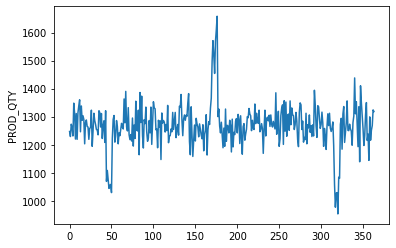

In [36]:
sns.lineplot(x=df_bydate.index,y='PROD_QTY',data=df_bydate)
plt.show()

Product quatity purchased remains within a certain range throughout the year except for twice it reduces to less than 1100 and once when it increases by 1600. These exceptional dates could be festivals/holidays.

In [79]:
all_dates = pd.date_range(start='2018-07-01',end='2019-06-30',freq='D')
full_year_dates = pd.DataFrame({'ALL':all_dates})
full_year_dates.head()

,ALL
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [80]:
df_date = pd.concat([df_bydate,full_year_dates], axis=1)

In [81]:
rem_date = 0
for idx, row in df_date.iterrows():
    if row.DATE != row.ALL:
        rem_date = row.ALL
        break

print(rem_date)

2018-12-25 00:00:00


On 25 December,2018 because of Christmas the shops would be closed and hence no sales has been recorded.

In [31]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242007 entries, 0 to 242008
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    242007 non-null  datetime64[ns]
 1   STORE_NBR               242007 non-null  int64         
 2   LYLTY_CARD_NBR          242007 non-null  int64         
 3   TXN_ID                  242007 non-null  int64         
 4   PROD_NBR                242007 non-null  int64         
 5   PROD_QTY                242007 non-null  int64         
 6   TOT_SALES               242007 non-null  float64       
 7   PACK_SIZE               242007 non-null  int64         
 8   COMPANY_INITIALS        242007 non-null  int64         
 9   MIDAGE SINGLES/COUPLES  242007 non-null  uint8         
 10  NEW FAMILIES            242007 non-null  uint8         
 11  OLDER FAMILIES          242007 non-null  uint8         
 12  OLDER SINGLES/COUPLES   242007

In [82]:
customer_df.to_csv('RetailTask1.csv',index=False)